<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Early-Warning-Signals" data-toc-modified-id="Early-Warning-Signals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Early Warning Signals</a></span><ul class="toc-item"><li><span><a href="#Import-some-libraries" data-toc-modified-id="Import-some-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import some libraries</a></span></li><li><span><a href="#Early-Warning-Signals" data-toc-modified-id="Early-Warning-Signals-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Early Warning Signals</a></span><ul class="toc-item"><li><span><a href="#Metric-based" data-toc-modified-id="Metric-based-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Metric-based</a></span><ul class="toc-item"><li><span><a href="#Standard-Deviation" data-toc-modified-id="Standard-Deviation-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Standard Deviation</a></span><ul class="toc-item"><li><span><a href="#Activated-Macrophages" data-toc-modified-id="Activated-Macrophages-1.2.1.1.1"><span class="toc-item-num">1.2.1.1.1&nbsp;&nbsp;</span>Activated Macrophages</a></span></li></ul></li><li><span><a href="#Skewness" data-toc-modified-id="Skewness-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Skewness</a></span></li><li><span><a href="#Kurtosis" data-toc-modified-id="Kurtosis-1.2.1.3"><span class="toc-item-num">1.2.1.3&nbsp;&nbsp;</span>Kurtosis</a></span></li><li><span><a href="#Autocorrelation-at-lag-1" data-toc-modified-id="Autocorrelation-at-lag-1-1.2.1.4"><span class="toc-item-num">1.2.1.4&nbsp;&nbsp;</span>Autocorrelation at lag 1</a></span></li><li><span><a href="#Conditional-heteroskedasticity" data-toc-modified-id="Conditional-heteroskedasticity-1.2.1.5"><span class="toc-item-num">1.2.1.5&nbsp;&nbsp;</span>Conditional heteroskedasticity</a></span></li></ul></li><li><span><a href="#Model-based" data-toc-modified-id="Model-based-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Model-based</a></span><ul class="toc-item"><li><span><a href="#Time-varying-AR" data-toc-modified-id="Time-varying-AR-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Time-varying AR</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Early Warning Signals

Detecting critical transitions in timeseries

Author: Alva Presbitero

## Import some libraries

In [13]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from patsy import dmatrices

from scipy.stats import skew, kurtosis
from itertools import product

from utils import *

In [14]:
noise = []
noise_type_list = ['sigmoid', 'gaussian', 'linear']
sigma_type_list = ['constant', 'increasing']

output = list(product(noise_type_list, sigma_type_list))

for index, (noise_type, sigma_type) in enumerate(output):
    print ('noise_type :', index, noise_type, sigma_type)
    pickle_dir = f'../result/pickle/noise/{noise_type}/{sigma_type}/'
    pickle_file = noise_type + '_' + sigma_type + '.pickle'
    with open(pickle_dir + pickle_file, 'rb') as f:
        noise.append(pickle.load(f))
#         print (noise_list[index])

noise_type : 0 sigmoid constant
noise_type : 1 sigmoid increasing
noise_type : 2 gaussian constant
noise_type : 3 gaussian increasing
noise_type : 4 linear constant
noise_type : 5 linear increasing


In [15]:
# noise_1, noise_2, noise_3, noise_4 = noise_list[0], noise_list[1], noise_list[2], noise_list[3]
noise_names = ['Linear (constant sigma)', 'Linear (increasing sigma)',
               'Sigmoid (constant sigma)', 'Sigmoid (increasing sigma)', 
               'Gaussian (constant sigma)', 'Gaussian (increasing sigma)']

## Early Warning Signals

<img src='../images/EWS' width="400" height="400">


### Metric-based
#### Standard Deviation

Linear (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.9928871825634873
Slope : -4565.040522969704
 
 
Linear (constant sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.7977515503100621
Slope : -1.6251764129738373
 
 
Linear (increasing sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.996670425914817
Slope : -4164.690862425494
 
 
Linear (increasing sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.7646425285057011
Slope : 2.860282436214444
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -1.0
Slope : -10057.743769263936
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : decreasing
h : True
p

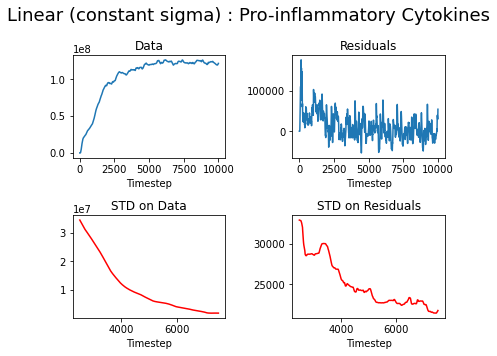

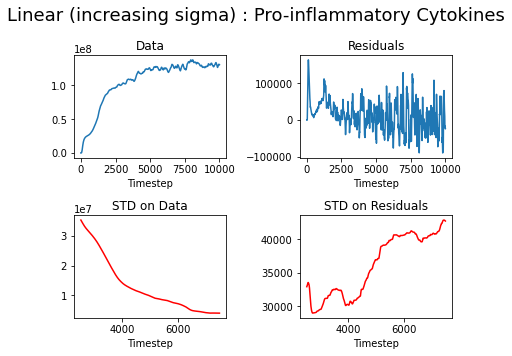

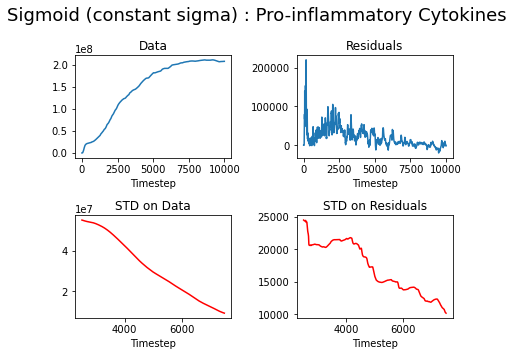

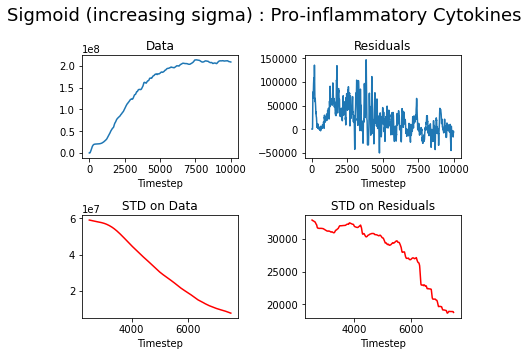

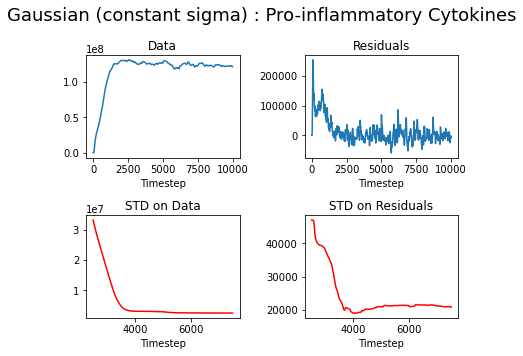

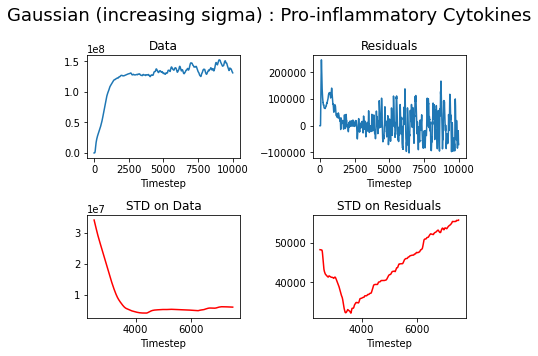

In [16]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='CH', 
         noise_name = noise_names[choice], 
         immune_name = 'Pro-inflammatory Cytokines', 
         method_name = 'STD', 
         method = do_ews_std,
         win_size = len(noise[choice])/2)

Linear (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.9734664267146571
Slope : -671.0776614720703
 
 
Linear (constant sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.977278975795159
Slope : -18.910866448763713
 
 
Linear (increasing sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.842200199960008
Slope : -219.55440291624512
 
 
Linear (increasing sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.9081293058611722
Slope : 17.376838006594106
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.999121775644871
Slope : -1911.4174472281677
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : decrea

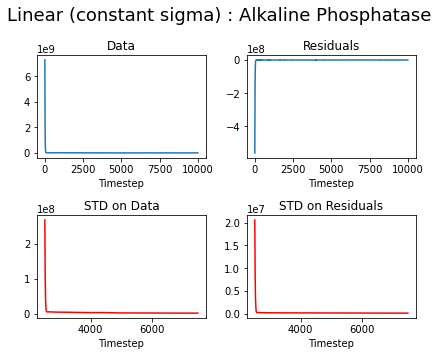

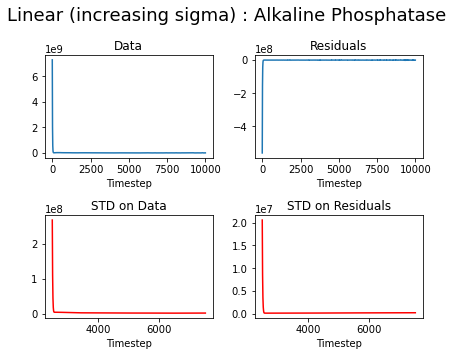

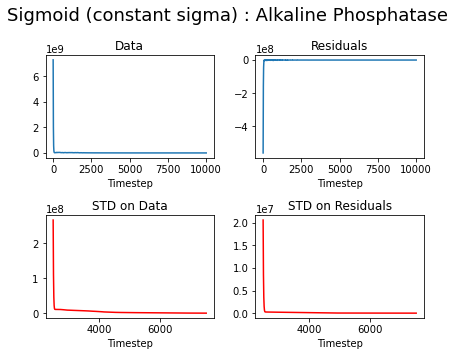

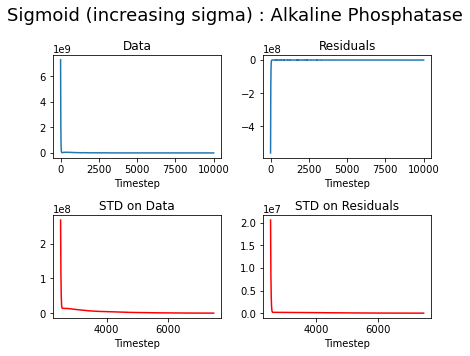

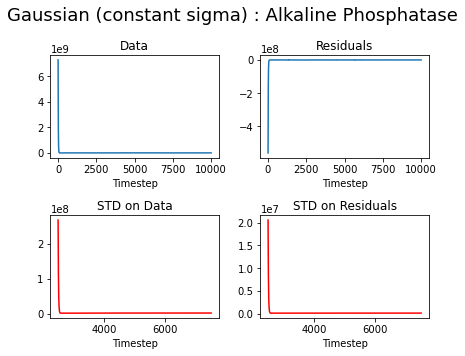

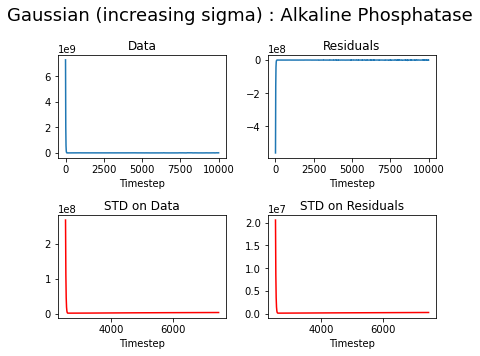

In [18]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='AP_Eblood', 
         noise_name = noise_names[choice], 
         immune_name = 'Alkaline Phosphatase', 
         method_name = 'STD', 
         method = do_ews_std,
         win_size = len(noise[choice])/2)

##### Activated Macrophages

Linear (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -1.0
Slope : -0.0004319215333230651
 
 
Linear (constant sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.9999996799359872
Slope : -3.7103604473465714e-08
 
 
Linear (increasing sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -1.0
Slope : -0.00043192478396677424
 
 
Linear (increasing sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.9999996799359872
Slope : -3.710275136122949e-08
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -1.0
Slope : -0.00043193989350387397
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : decreasing
h : True
p : 0.0

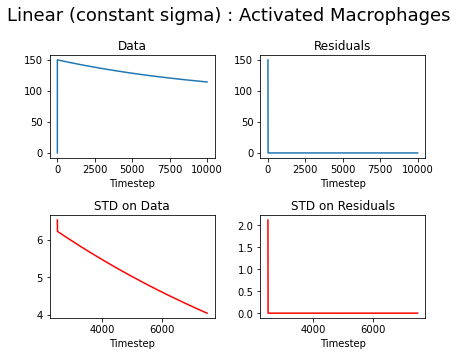

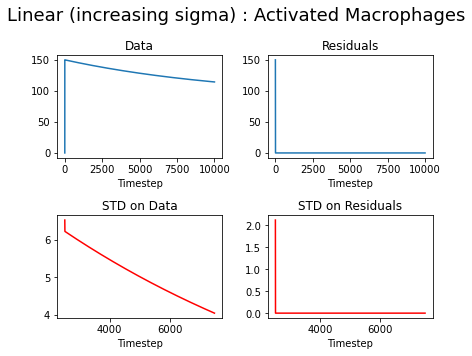

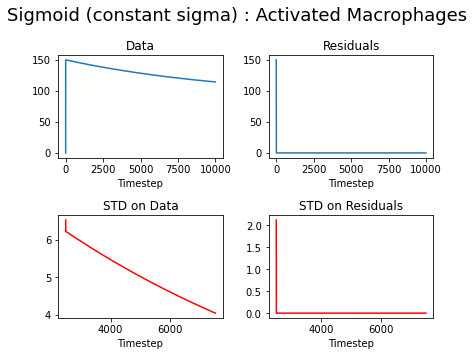

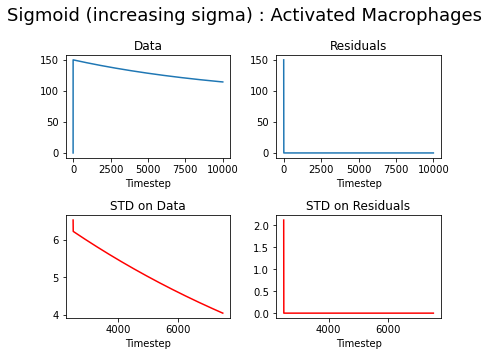

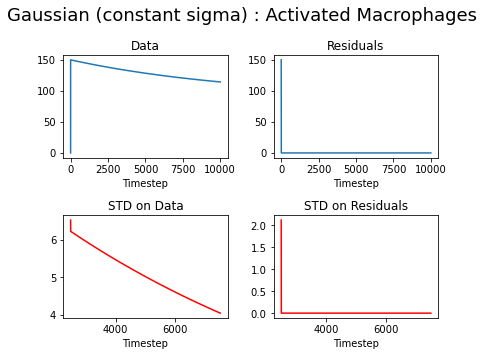

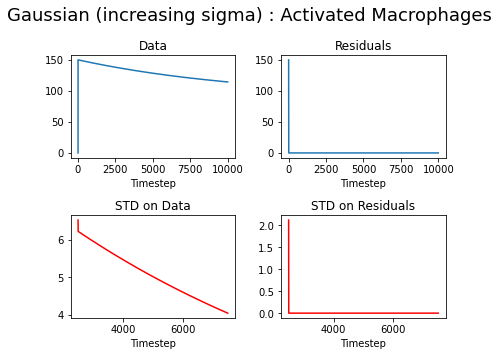

In [20]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='M_A', 
         noise_name = noise_names[choice], 
         immune_name = 'Activated Macrophages', 
         method_name = 'STD', 
         method = do_ews_std,
         win_size = len(noise[choice])/2)

Linear (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.9847835232953409
Slope : -0.004570832156513464
 
 
Linear (constant sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.9864760152030406
Slope : -1.8684098297476706e-06
 
 
Linear (increasing sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.984220275944811
Slope : -0.0045698222964373385
 
 
Linear (increasing sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.9865419483896779
Slope : -1.870121324212549e-06
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.9843458508298341
Slope : -0.004565906627278251
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Residual
---------------------

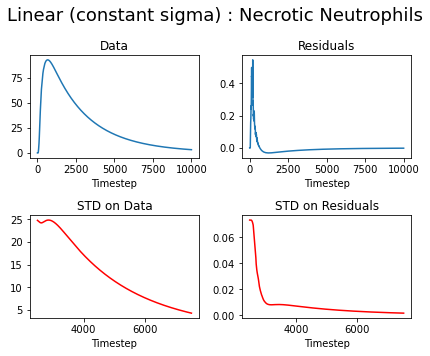

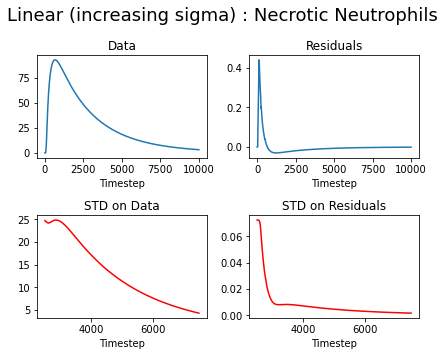

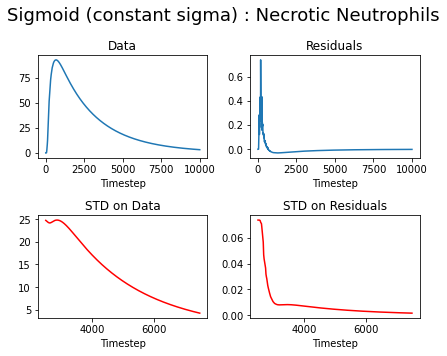

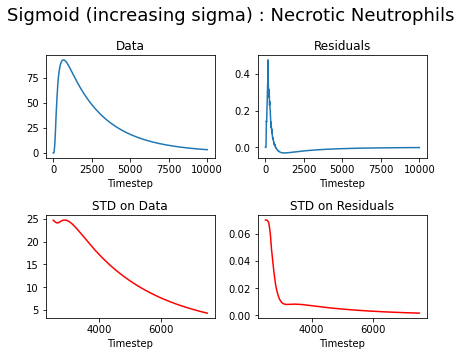

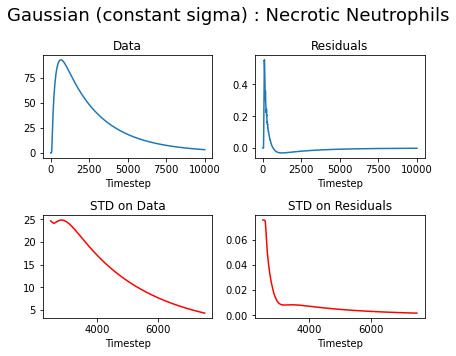

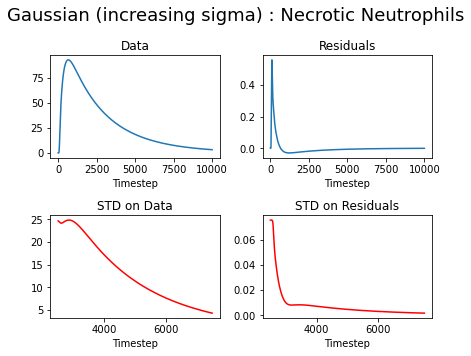

In [21]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='ND_N', 
         noise_name = noise_names[choice], 
         immune_name = 'Necrotic Neutrophils', 
         method_name = 'STD', 
         method = do_ews_std,
         win_size = len(noise[choice])/2)

Linear (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.9993927614477105
Slope : -5.228620127274635e-07
 
 
Linear (constant sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.9998606121224245
Slope : -1.2889339272726759e-09
 
 
Linear (increasing sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.9994903419316137
Slope : -3.9334416517411537e-07
 
 
Linear (increasing sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.9997953190638128
Slope : -9.687398275800678e-10
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.9992585482903419
Slope : -8.185222628347992e-07
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Residual
-----------------

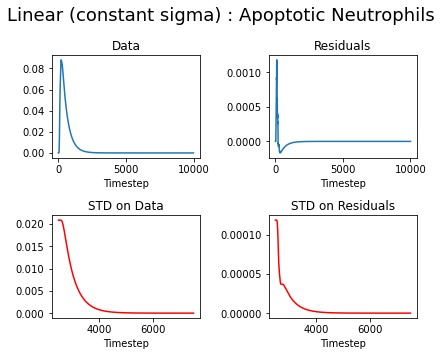

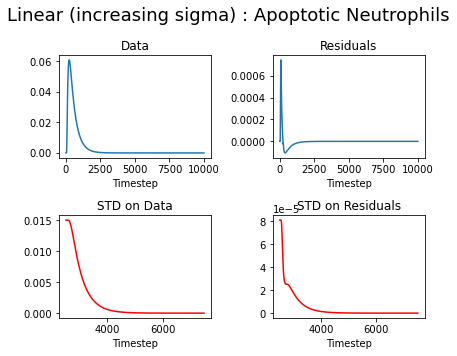

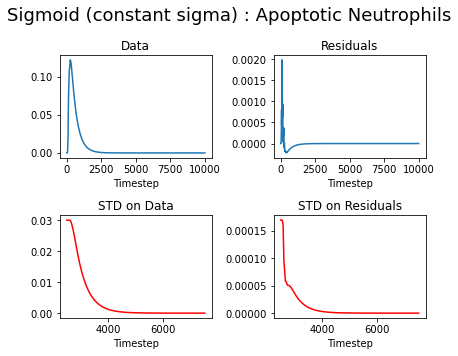

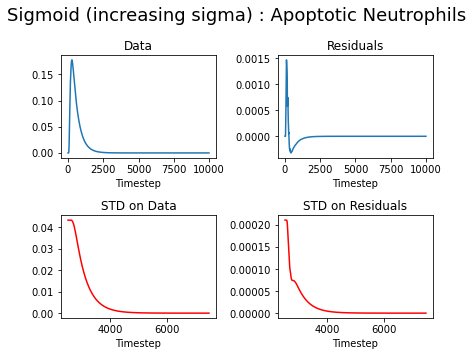

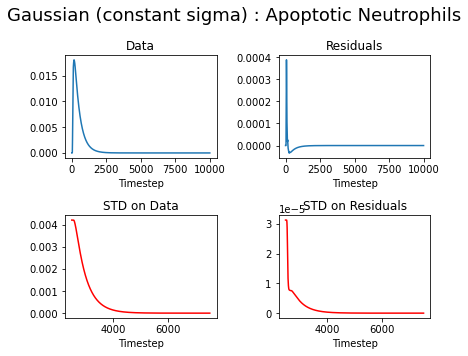

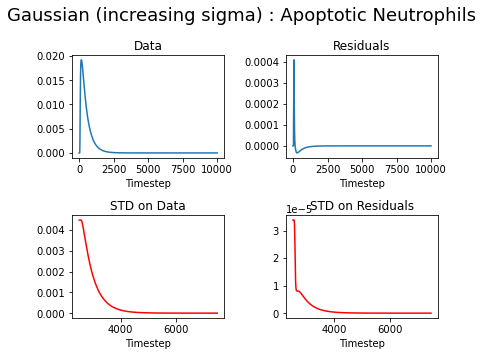

In [22]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='ND_A', 
         noise_name = noise_names[choice], 
         immune_name = 'Apoptotic Neutrophils', 
         method_name = 'STD', 
         method = do_ews_std,
         win_size = len(noise[choice])/2)

#### Skewness


Linear (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.40587066586682663
Slope : 0.0001250223491379854
 
 
Linear (constant sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.16534122824564912
Slope : 9.164675963925778e-06
 
 
Linear (increasing sigma) Mann Kendall Test Results: Original
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.5589066186762648
Slope : 0.00025218193905057133
 
 
Linear (increasing sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.5003579915983196
Slope : 4.923924796852383e-05
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.8111113777244551
Slope : -0.0001413019053863775
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Residual
------------------------

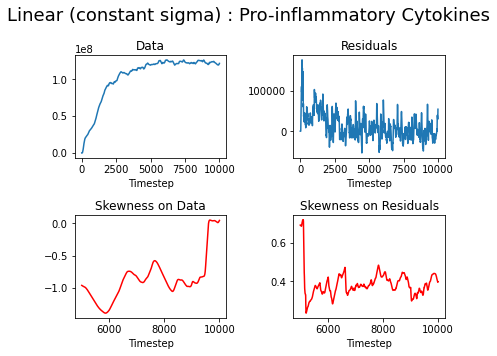

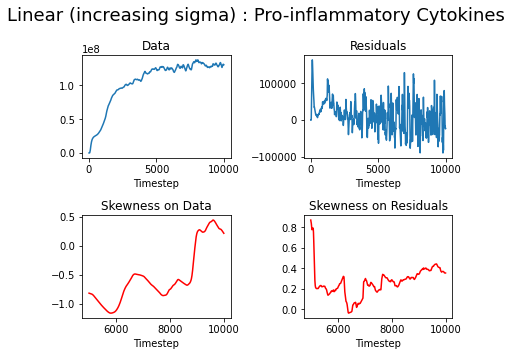

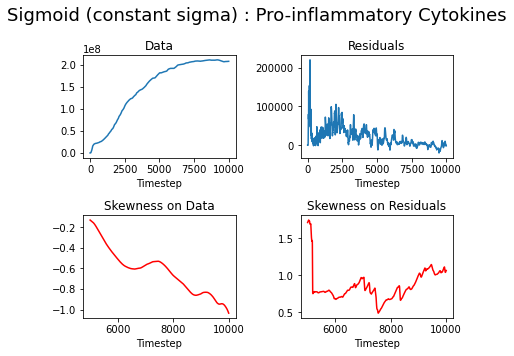

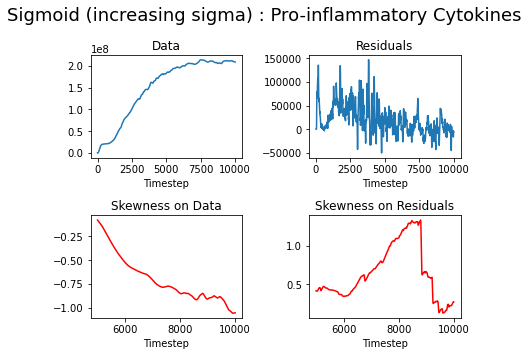

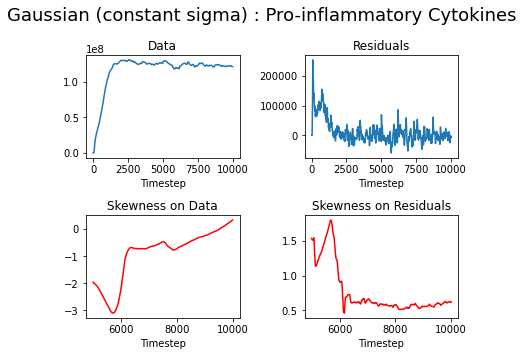

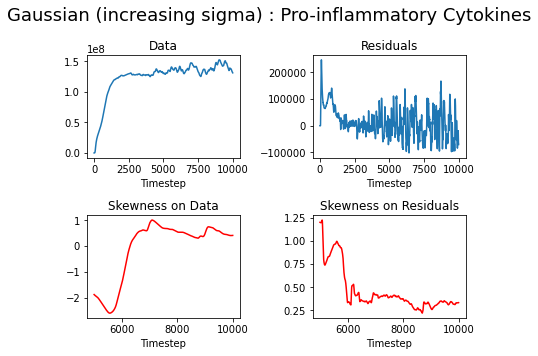

In [8]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='CH', 
         noise_name = noise_names[choice], 
         immune_name = 'Pro-inflammatory Cytokines', 
         method_name = 'Skewness', 
         method = do_ews_skew,
         win_size = len(noise[choice])/2)

Linear (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.425348850229954
Slope : -0.00014439032761117944
 
 
Linear (constant sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.289176075215043
Slope : 0.0001266872357840192
 
 
Linear (increasing sigma) Mann Kendall Test Results: Original
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.5630953809238153
Slope : 0.00014393045743101148
 
 
Linear (increasing sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : no trend
h : False
p : 0.6970374443736487
Tau : -0.0036719343868773756
Slope : -5.330788747976552e-07
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.2683568886222755
Slope : -5.286646037330124e-05
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Residual
------

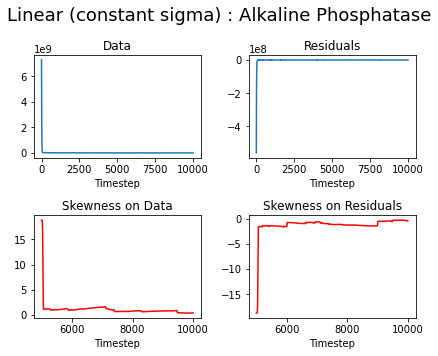

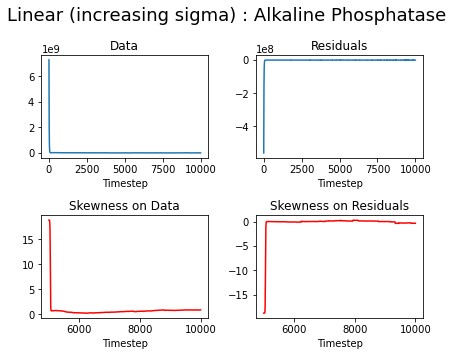

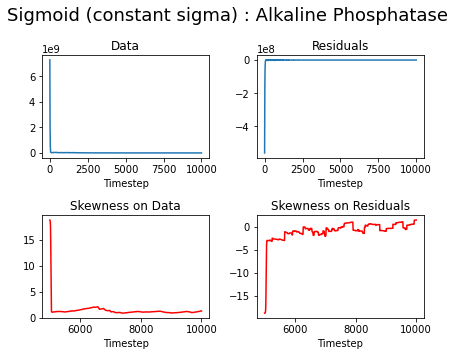

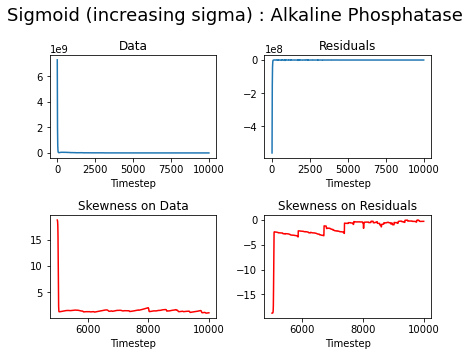

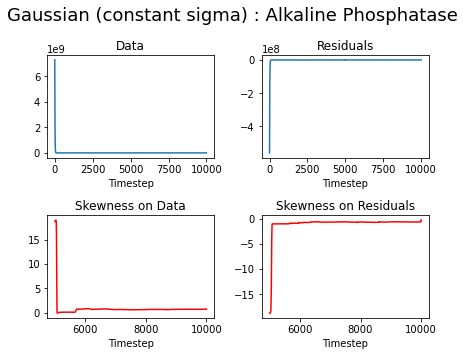

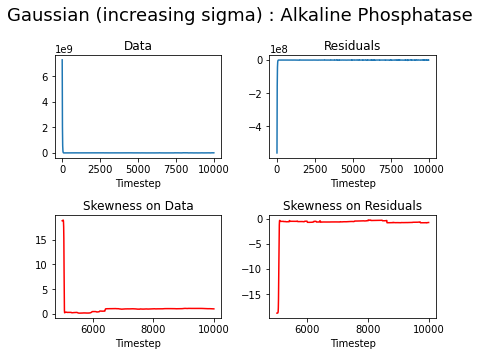

In [11]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='AP_Eblood', 
         noise_name = noise_names[choice], 
         immune_name = 'Alkaline Phosphatase', 
         method_name = 'Skewness', 
         method = do_ews_skew,
         win_size = len(noise[choice])/2)

#### Kurtosis

Linear (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.08445478904219156
Slope : -6.845732915686031e-05
 
 
Linear (constant sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.624701100220044
Slope : 0.0002305923934710385
 
 
Linear (increasing sigma) Mann Kendall Test Results: Original
-------------------------
Trend : increasing
h : True
p : 0.043504410650012204
Tau : 0.01903859228154369
Slope : 1.3846887585750194e-05
 
 
Linear (increasing sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.4387459891978396
Slope : -7.98089430578247e-05
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.6937945210957809
Slope : 0.00019837163629466716
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Residual
------

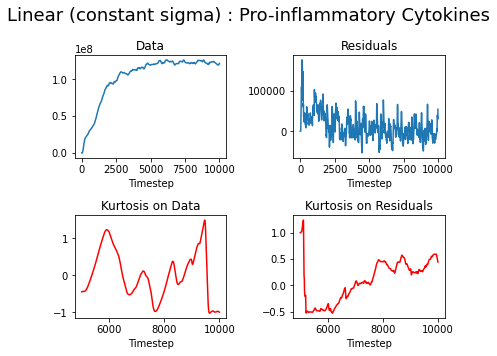

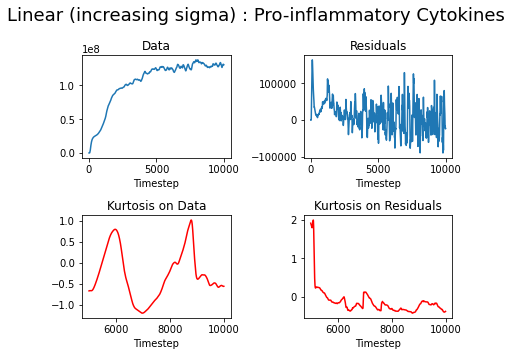

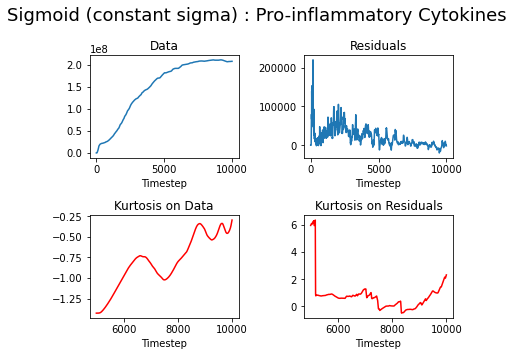

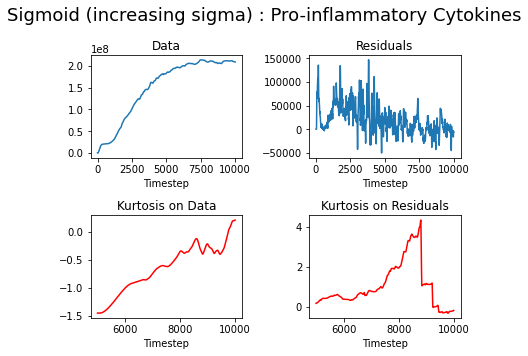

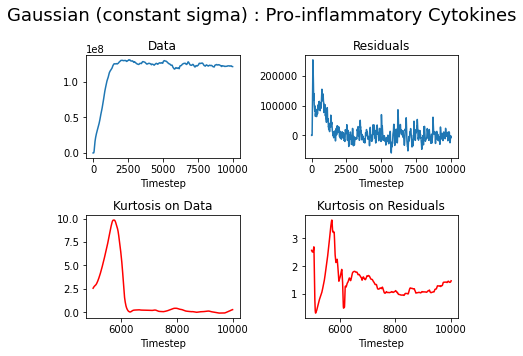

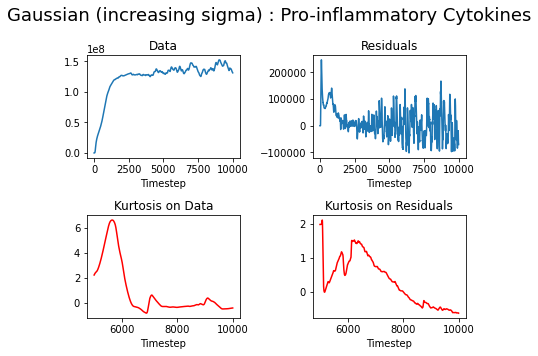

In [10]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='CH', 
         noise_name = noise_names[choice], 
         immune_name = 'Pro-inflammatory Cytokines', 
         method_name = 'Kurtosis', 
         method = do_ews_kurt,
         win_size = len(noise[choice])/2)

In [ ]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='AP_Eblood', 
         noise_name = noise_names[choice], 
         immune_name = 'Alkaline Phosphatase', 
         method_name = 'Kurtosis', 
         method = do_ews_kurt,
         win_size = len(noise[choice])/2)

#### Autocorrelation at lag 1

In [ ]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='CH', 
         noise_name = noise_names[choice], 
         immune_name = 'Pro-inflammatory Cytokines', 
         method_name = 'Auto-correlation (lag=1)', 
         method = do_ews_auto,
         win_size = len(noise[choice])/2)

In [ ]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='AP_Eblood', 
         noise_name = noise_names[choice], 
         immune_name = 'Alkaline Phosphatase', 
         method_name = 'Auto-correlation (lag=1)', 
         method = do_ews_auto,
         win_size = len(noise[choice])/2)

#### Conditional heteroskedasticity
Conditional heteroskedasticity means that variance at one time step has a positive relationship with variance at one or more previous time steps. This implies that periods of high variability will tend to follow periods of high variability and periods of low variability will tend to follow periods of low variability

Useful reference: https://towardsdatascience.com/heteroscedasticity-is-nothing-to-be-afraid-of-730dd3f7ca1f

Linear (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.43649846030793843
Slope : 2.1302717908747682e-141
 
 
Linear (constant sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.27938403680736146
Slope : 1.319866409235655e-06
 
 
Linear (increasing sigma) Mann Kendall Test Results: Original
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.24145722855428914
Slope : 8.972483248449142e-175
 
 
Linear (increasing sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.5867049409881976
Slope : 4.441014905963798e-05
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.12669122175564887
Slope : 0.0
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : incre

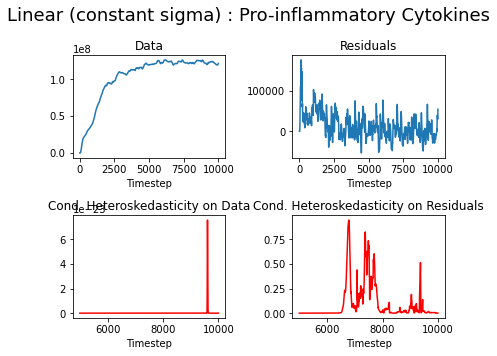

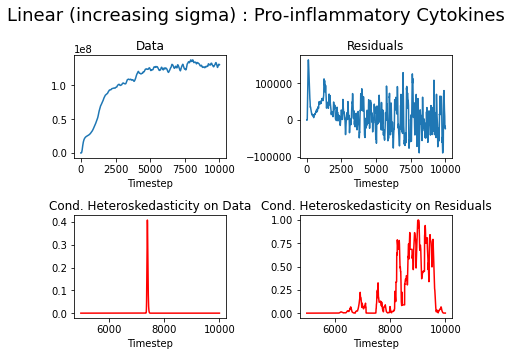

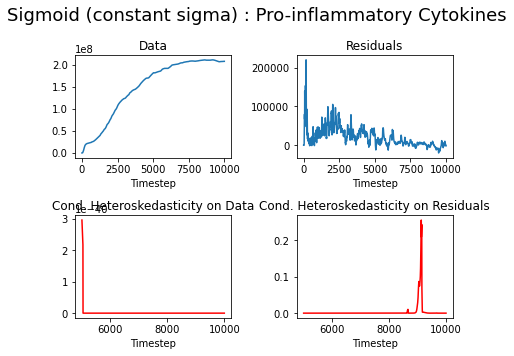

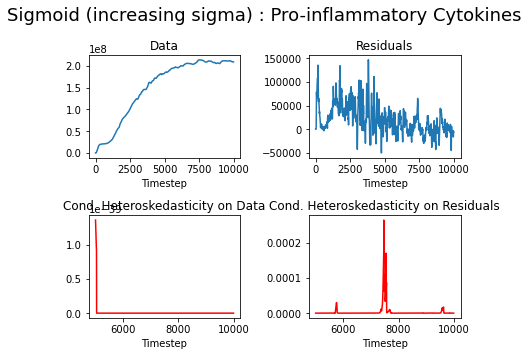

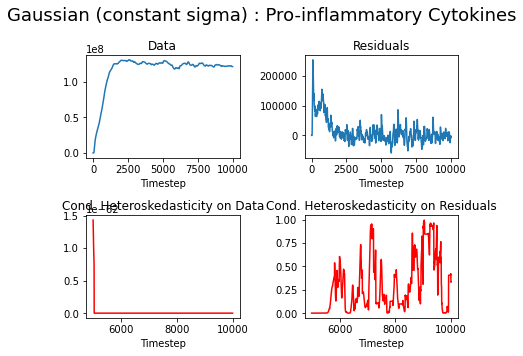

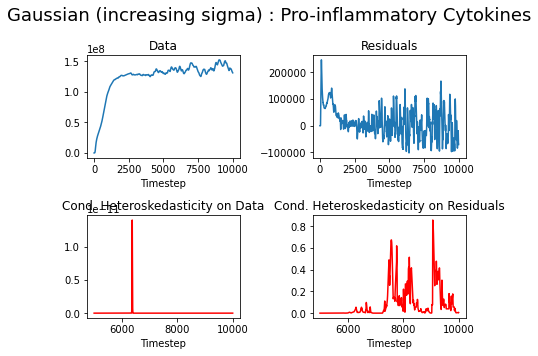

In [24]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='CH', 
         noise_name = noise_names[choice], 
         immune_name = 'Pro-inflammatory Cytokines', 
         method_name = 'Cond. Heteroskedasticity', 
         method = do_ews_ch,
         win_size = len(noise[choice])/2)

Linear (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.2221594081183763
Slope : 2.0993169021691964e-15
 
 
Linear (constant sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : decreasing
h : True
p : 0.0
Tau : -0.18373290658131627
Slope : -3.209223091904602e-06
 
 
Linear (increasing sigma) Mann Kendall Test Results: Original
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.24865570885822835
Slope : 1.240060818782027e-84
 
 
Linear (increasing sigma) Mann Kendall Test Results: Residual
-------------------------
Trend : increasing
h : True
p : 0.0
Tau : 0.20964488897779557
Slope : 8.102612903070496e-05
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Original
-------------------------
Trend : increasing
h : True
p : 1.7506589955473828e-08
Tau : 0.05314057188562288
Slope : 7.381907096453493e-215
 
 
Sigmoid (constant sigma) Mann Kendall Test Results: Residual
--

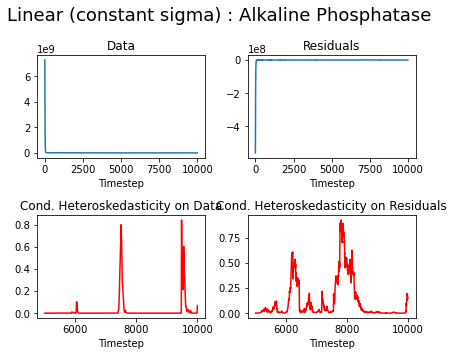

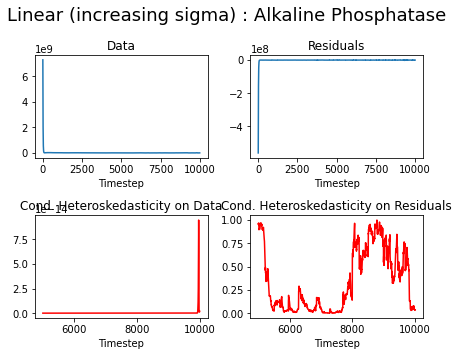

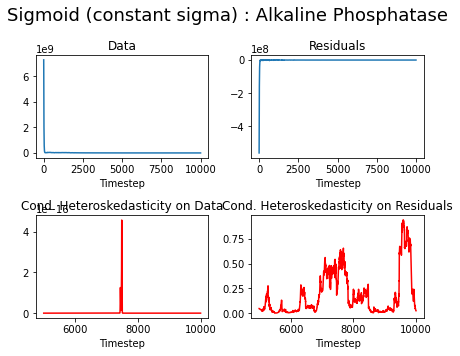

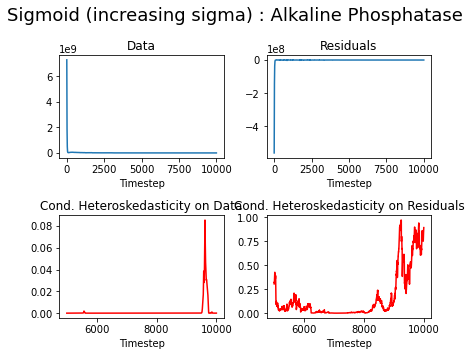

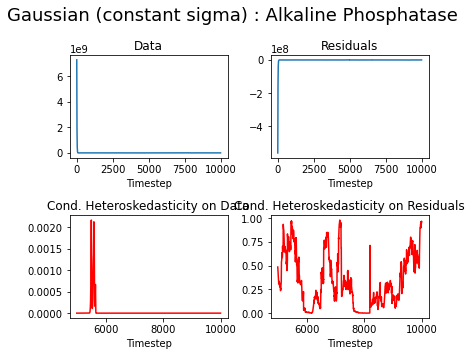

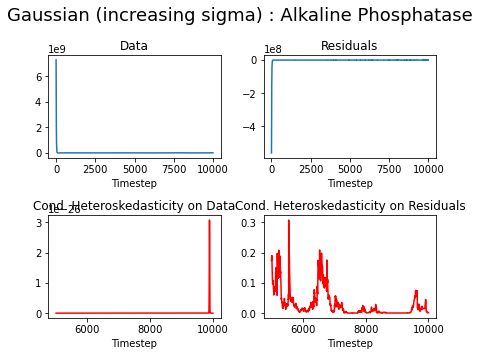

In [25]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='AP_Eblood', 
         noise_name = noise_names[choice], 
         immune_name = 'Alkaline Phosphatase', 
         method_name = 'Cond. Heteroskedasticity', 
         method = do_ews_ch,
         win_size = len(noise[choice])/2)

### Model-based

#### Time-varying AR
Time-varying AR(p) [autoregressive] models provide a model-based approach for estimating time-dependent return rates in time series, which can act as an early warning of a critical transition.

In [ ]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='CH', 
         noise_name = noise_names[choice], 
         immune_name = 'Pro-inflammatory Cytokines', 
         method_name = 'AR(1)', 
         method = do_ews_ar,
         win_size = len(noise[choice])/2,
         log = True)

In [ ]:
n=6
for choice in range(n):
    plot(data=noise[choice], 
         immune='AP_Eblood', 
         noise_name = noise_names[choice], 
         immune_name = 'Alkaline Phosphatase', 
         method_name = 'AR(1)', 
         method = do_ews_ar,
         win_size = len(noise[choice])/2,
         log = True)